In [108]:
import matplotlib.pyplot as plt
import numpy as np
import wave
CHUNKSIZE = 1024 #given


Bytes Per Sample: 1
Sampling Rate: 16000
Number of Samples: 16384
Read all bytes from /Users/optimus/test1_int8.wav
Size of Array: 16384

Bytes Per Sample: 2
Sampling Rate: 16000
Number of Samples: 16384
Read all bytes from /Users/optimus/test1_int16.wav
Size of Array: 16384

Bytes Per Sample: 4
Sampling Rate: 16000
Number of Samples: 16384
Read all bytes from /Users/optimus/test1_int32.wav
Size of Array: 16384


<Figure size 800x400 with 0 Axes>

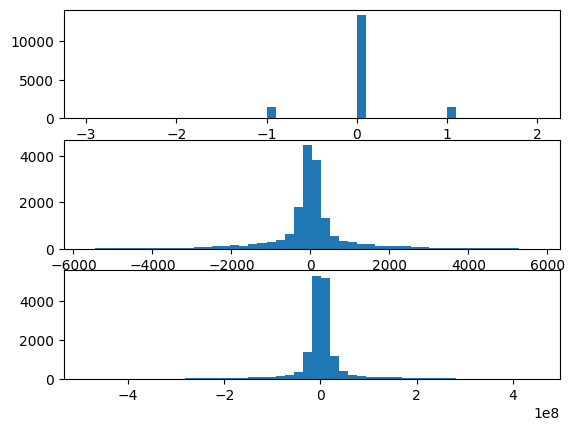

In [109]:
debug = False
def create_histogram(filename,ax,index):
    wf = wave.open(file)
    number_samples = wf.getnframes()
    bytes_per_sample = wf.getsampwidth()
    
    # https://docs.python.org/3/library/struct.html#format-characters
    format_char = ''
    if index == 0:          # 8-bit / 1 Byte int
        format_char = 'b'
    elif index == 1:        # 16-bit / 2 Btye int
        format_char = 'h'
    else:
        format_char = 'i' # 32-bit / 4byte int
    
    b = []
    i = 0
    while True:
        # bits - type bytes / binary string
        bits = wf.readframes(CHUNKSIZE)

        if len(bits) == 0:
            print(f'Read all bytes from {file}')
            break
        #print(i, len(bits))
        
        format_string = f'{CHUNKSIZE}{format_char}'
        signed_int = struct.unpack(format_string, bits)
        b.extend(signed_int)
        i += 1
    if debug: 
        print(f"\nBytes Per Sample: {wf.getsampwidth()}")
        print(f"Sampling Rate: {wf.getframerate()}")
        print(f"Number of Samples: {wf.getnframes()}")
        print(f"Size of Array: {len(b)}")
    ax[index].hist(b,bins=50)

plt.figure(1, figsize=(8, 4))
#plt.subplot(1,3,1)
fig, axs = plt.subplots(3)

file = '/Users/optimus/test1_int8.wav'
create_histogram(file,axs,0)

file = '/Users/optimus/test1_int16.wav'
create_histogram(file,axs,1)

file = '/Users/optimus/test1_int32.wav'
create_histogram(file,axs,2)

**Observation**: 
Samples appear to have a range that does not violate their maximum ranges afforded that bit-resolution.  I wonder what might happen if I normalized the song?  